# Sensor Analysis

[**`sensor-data.csv`**](sensor-data.csv)

Format 1697 columns:

* `timestamp` (1 column, float, seconds)
* `x`, `y`, `z` (position, 3 columns, float, meters, global coordinates)
* `alpha`, `beta`, `gamma` (orientation, 3 columns, float, radians, global coordinates)
* `us_1`-`us_16` (ultrasonic sensor readings, 16 columns, float, meters, robot coordinates)
* `laser_1_x`-`laser_558_z` (laser sensor readings, 1674 columns, float, meters, robot coordinates)
    - at most 558 readings of each x, y, z component (empty when no readings)


In [1]:
using DataFrames
using CSV
using Plots
using StatsPlots
pyplot()

Plots.PyPlotBackend()

In [2]:
@time sensor_data = CSV.read("sensor-data.csv");

  7.755784 seconds (15.38 M allocations: 749.436 MiB, 8.45% gc time)


In [3]:
first(sensor_data, 10)

,Column1,timestamp,x,y,z,alpha,beta,gamma
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,1.56983e9,-2.02528,-0.824988,0.138677,-8.34027e-5,-0.00199491,-1.45129e-5
2,1,1.56983e9,-1.97991,-0.824997,0.138671,-7.03635e-5,-0.00210816,-0.000275701
3,2,1.56983e9,-1.90681,-0.825029,0.138671,-7.25578e-5,-0.00208382,-0.000199489
4,3,1.56983e9,-1.83362,-0.825041,0.138692,-8.3954e-5,-0.00152187,-0.000145771
5,4,1.56983e9,-1.78487,-0.825051,0.138702,-6.22464e-5,-0.00143969,-0.000128185
6,5,1.56983e9,-1.71176,-0.82506,0.138698,-6.7272e-5,-0.00145672,-0.000130821
7,6,1.56983e9,-1.66304,-0.825064,0.138695,-7.85449e-5,-0.0015591,-0.000122266
8,7,1.56983e9,-1.61429,-0.825076,0.138696,-7.8043e-5,-0.00152256,-0.000123342
9,8,1.56983e9,-1.54119,-0.825072,0.138693,-8.16519e-5,-0.00162466,-0.000122423


In [4]:
select!(sensor_data, Not(:Column1))
first(sensor_data, 10)

,timestamp,x,y,z,alpha,beta,gamma
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.56983e9,-2.02528,-0.824988,0.138677,-8.34027e-5,-0.00199491,-1.45129e-5
2,1.56983e9,-1.97991,-0.824997,0.138671,-7.03635e-5,-0.00210816,-0.000275701
3,1.56983e9,-1.90681,-0.825029,0.138671,-7.25578e-5,-0.00208382,-0.000199489
4,1.56983e9,-1.83362,-0.825041,0.138692,-8.3954e-5,-0.00152187,-0.000145771
5,1.56983e9,-1.78487,-0.825051,0.138702,-6.22464e-5,-0.00143969,-0.000128185
6,1.56983e9,-1.71176,-0.82506,0.138698,-6.7272e-5,-0.00145672,-0.000130821
7,1.56983e9,-1.66304,-0.825064,0.138695,-7.85449e-5,-0.0015591,-0.000122266
8,1.56983e9,-1.61429,-0.825076,0.138696,-7.8043e-5,-0.00152256,-0.000123342
9,1.56983e9,-1.54119,-0.825072,0.138693,-8.16519e-5,-0.00162466,-0.000122423


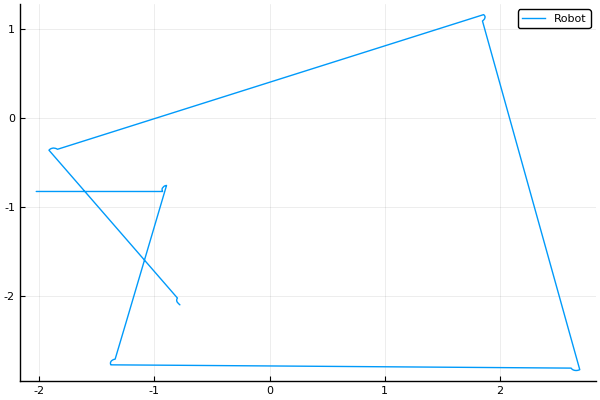

In [5]:
@df sensor_data plot(:x, :y, label="Robot")

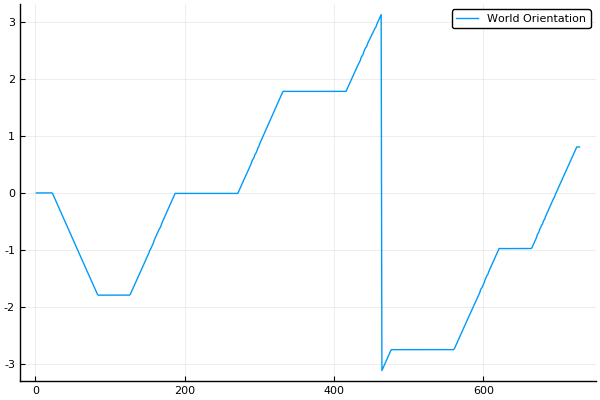

In [6]:
@df sensor_data plot(:gamma, label="World Orientation")

## Transformation between Coordinates

Lecture 6 - Locomotion II [ [PDF](https://www.ic.unicamp.br/~esther/teaching/2019s2/mo651/Lecture%2005%20-%20LocomotionII.pdf) ]

**Robot Coordinates to Global Coordinates (World)**

$$
\begin{bmatrix}
x_{g} \\
y_{g} \\
1
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & \Delta{x} \\
0 & 1 & \Delta{y} \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) &  \cos(\theta) & 0 \\
0            &  0            & 1
\end{bmatrix}
\begin{bmatrix}
x_{r} \\
y_{r} \\
1
\end{bmatrix} \\
$$

**Global Coordinates to Robot Coordinates**

$$
\begin{bmatrix}
x_{r} \\
y_{r} \\
1
\end{bmatrix}
=
\begin{bmatrix}
 \cos(\theta) & \sin(\theta) & 0 \\
-\sin(\theta) & \cos(\theta) & 0 \\
 0            & 0            & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & -\Delta{x} \\
0 & 1 & -\Delta{y} \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_{g} \\
y_{g} \\
1
\end{bmatrix} \\
$$


In [7]:
function T_r2g(x, y, θ)
    Ttrans = [1 0 x
              0 1 y
              0 0 1]
    Trot = [cos(θ) -sin(θ) 0
            sin(θ)  cos(θ) 0
            0       0      1]
    return Ttrans * Trot
end

function coords_global(x, y, θ, xr, yr)
    T = T_r2g(x, y, θ)
    R = [xr
         yr
         1]
    xg, yg, _ = T * R

    return xg, yg
end

xg, yg = coords_global(2.0, 3.0, 30π/180, 0.5, 1.0)

# G = (1.933, 4.116)
println("(0.5, 1.0) -> (", round(xg, digits=3), ", ", round(yg, digits=3), ")")

(0.5, 1.0) -> (1.933, 4.116)


In [8]:
function T_g2r(x, y, θ)
    Trot = [ cos(θ) sin(θ) 0
            -sin(θ) cos(θ) 0
             0      0      1]
    Ttrans = [1 0 -x
              0 1 -y
              0 0 1]
    return Trot * Ttrans
end

function coords_robot(x, y, θ, xg, yg)
    T = T_g2r(x, y, θ)
    G = [xg
         yg
         1]
    xr, yr, _ = T * G

    return xr, yr
end

xr, yr = coords_robot(4.0, 2.0, 30π/180, 3.0, 5.0)

# R = (0.634, 3.098)
println("(3.0, 5.0) -> (", round(xr, digits=3), ", ", round(yr, digits=3), ")")

(3.0, 5.0) -> (0.634, 3.098)


## Point Cloud - Laser Sensor

In [9]:
laser_cols = [Symbol(string("laser_", i, "_", d)) for d=["x", "y"], i=1:558]
laser_cols = reshape(laser_cols, prod(size(laser_cols)))

size(laser_cols)

(1116,)

In [10]:
laser_cols[1:10]

10-element Array{Symbol,1}:
 :laser_1_x
 :laser_1_y
 :laser_2_x
 :laser_2_y
 :laser_3_x
 :laser_3_y
 :laser_4_x
 :laser_4_y
 :laser_5_x
 :laser_5_y

In [11]:
X = Vector{Vector{Float64}}()
Y = Vector{Vector{Float64}}()

for r in eachrow(sensor_data)
    x, y, θ = r[[:x, :y, :gamma]]
    # Get laser readings (ignore missing data)
    laser_data = collect(skipmissing(r[laser_cols]))
    # Reshape 2xN (N = number of readings, dim=1 is x coord, dim=2 is y coord)
    laser_data = reshape(laser_data, 2, length(laser_data)÷2)
    # Add an extra dim with 1 required for coordinate tranformation R -> G
    d3 = ones(1, size(laser_data)[2])
    laser_data = vcat(laser_data, d3)
    # Tranform coordinates from R to G
    T = T_r2g(x, y, θ)
    laser_data = T * laser_data

    push!(X, laser_data[1, :])
    push!(Y, laser_data[2, :])    
end

X = vcat(X...)
Y = vcat(Y...)

println(size(X))
println(size(Y))

(308078,)
(308078,)


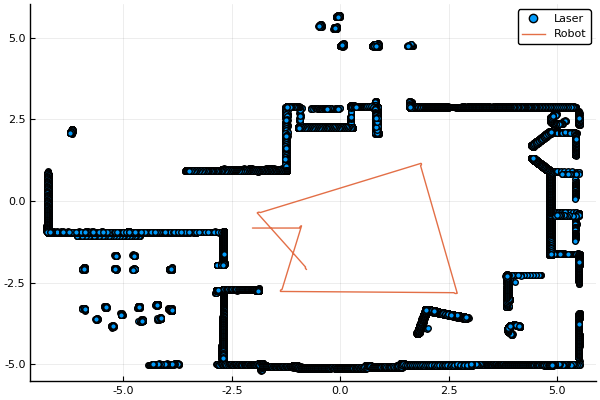

In [12]:
scatter(X, Y, label="Laser")
@df sensor_data plot!(:x, :y, label="Robot")